In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path = '/content/drive/MyDrive/Road_Accident_Aalysis_project/US_Accidents_March23.csv'

In [4]:
accidents_df = pd.read_csv(file_path, nrows=100000)

In [5]:
print(f'Dataset loaded successfully with shape: {accidents_df.shape}')

Dataset loaded successfully with shape: (100000, 46)


In [6]:
accidents_df['Start_Lat'] = pd.to_numeric(accidents_df['Start_Lat'], errors='coerce')
accidents_df['Start_Lng'] = pd.to_numeric(accidents_df['Start_Lng'], errors='coerce')

geo_df = accidents_df.dropna(subset=['Start_Lat', 'Start_Lng'])

print(f"Number of records with valid coordinates: {geo_df.shape[0]}")

Number of records with valid coordinates: 100000


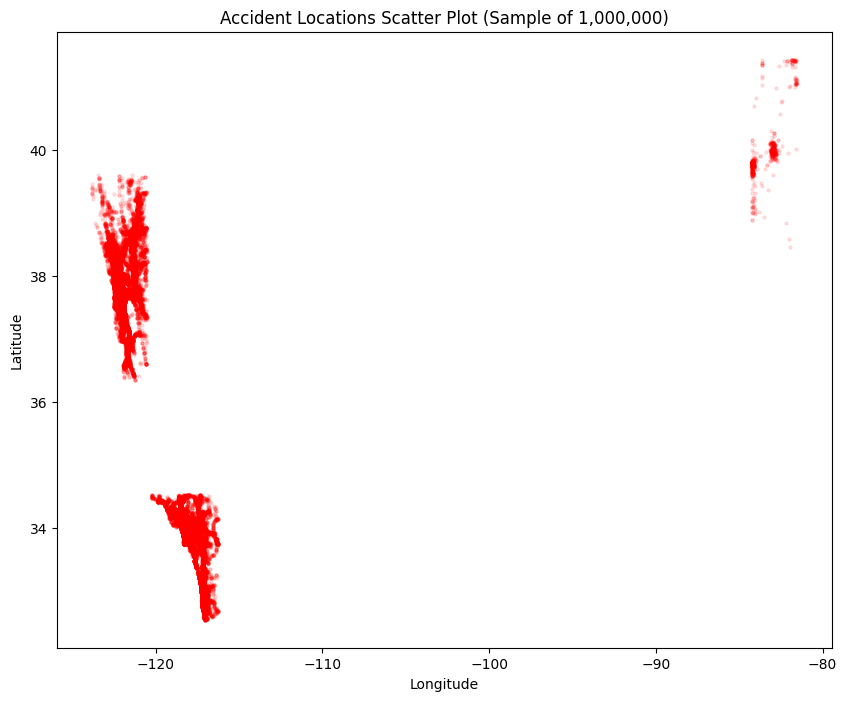

In [8]:
plt.figure(figsize=(10, 8))
sample_df = geo_df.sample(n=100000, random_state=42)
plt.scatter(sample_df['Start_Lng'], sample_df['Start_Lat'], alpha=0.1, s=5, c='red')
plt.title('Accident Locations Scatter Plot (Sample of 1,000,000)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/tmp/ipython-input-1688655985.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index[:10], y=state_counts.values[:10], palette='viridis')


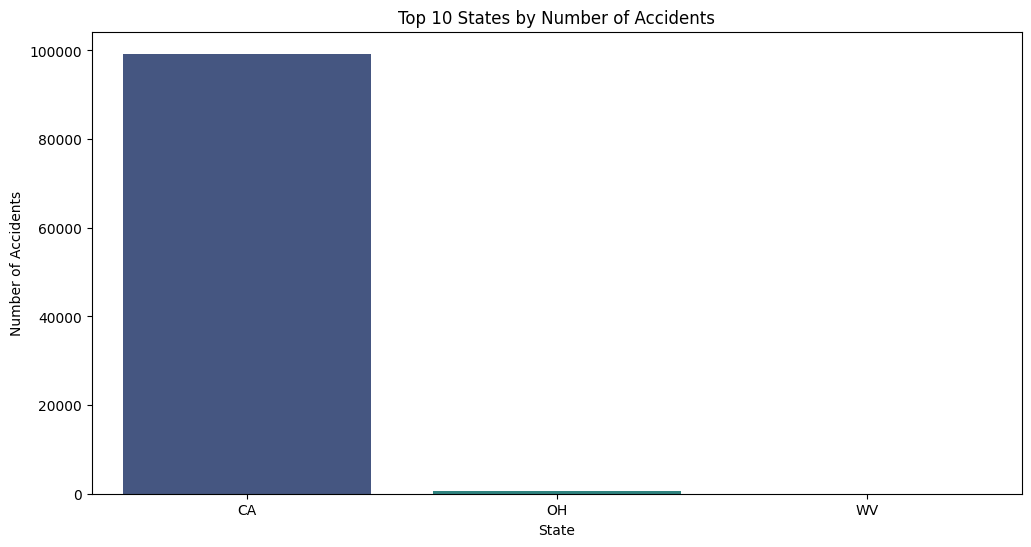

In [9]:
state_counts = geo_df['State'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index[:10], y=state_counts.values[:10], palette='viridis')
plt.title('Top 10 States by Number of Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('State')
plt.show()

/tmp/ipython-input-3505420560.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette='magma')


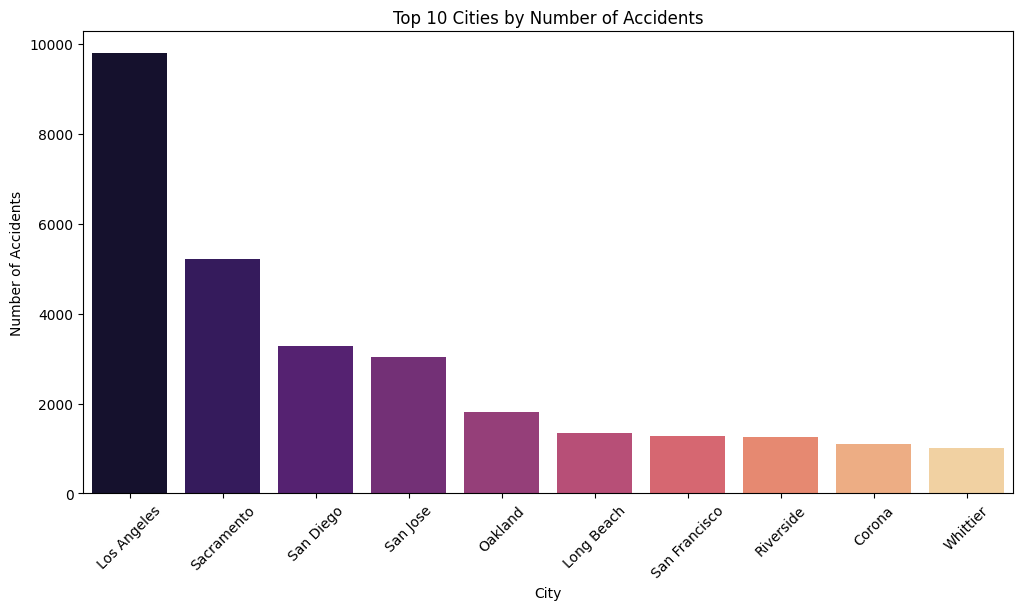

In [10]:
city_counts = geo_df['City'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='magma')
plt.title('Top 10 Cities by Number of Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.show()

In [11]:
top_5_states = state_counts.head(5)
top_5_cities = city_counts.head(5)

print("Top 5 Accident-Prone States:")
print(top_5_states)

print("\nTop 5 Accident-Prone Cities:")
print(top_5_cities)

Top 5 Accident-Prone States:
State
CA    99272
OH      726
WV        2
Name: count, dtype: int64

Top 5 Accident-Prone Cities:
City
Los Angeles    9792
Sacramento     5223
San Diego      3275
San Jose       3026
Oakland        1802
Name: count, dtype: int64


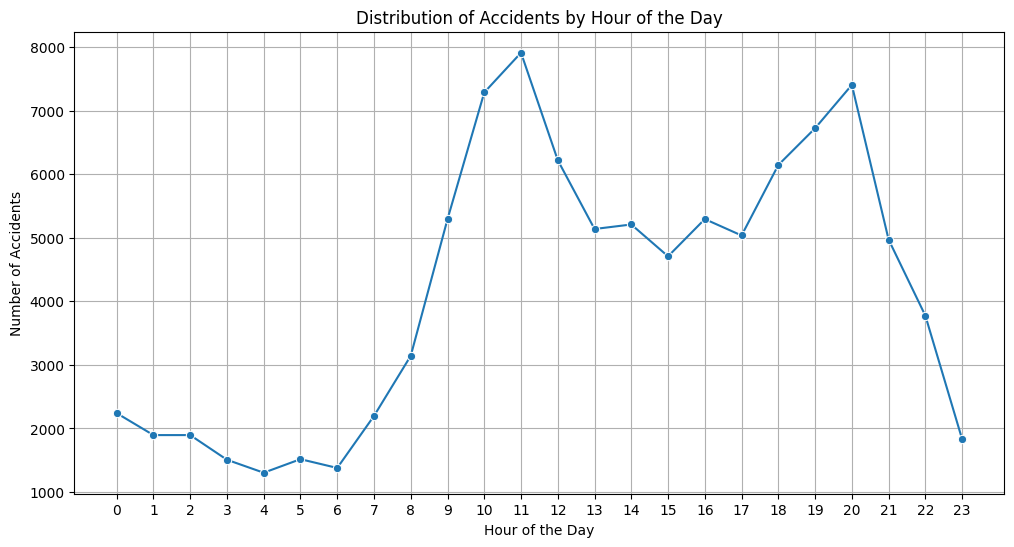

In [12]:
accidents_df['Start_Time'] = pd.to_datetime(accidents_df['Start_Time'], errors='coerce')


accidents_df['Hour'] = accidents_df['Start_Time'].dt.hour


hourly_counts = accidents_df['Hour'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title('Distribution of Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

<Figure size 1500x800 with 0 Axes>

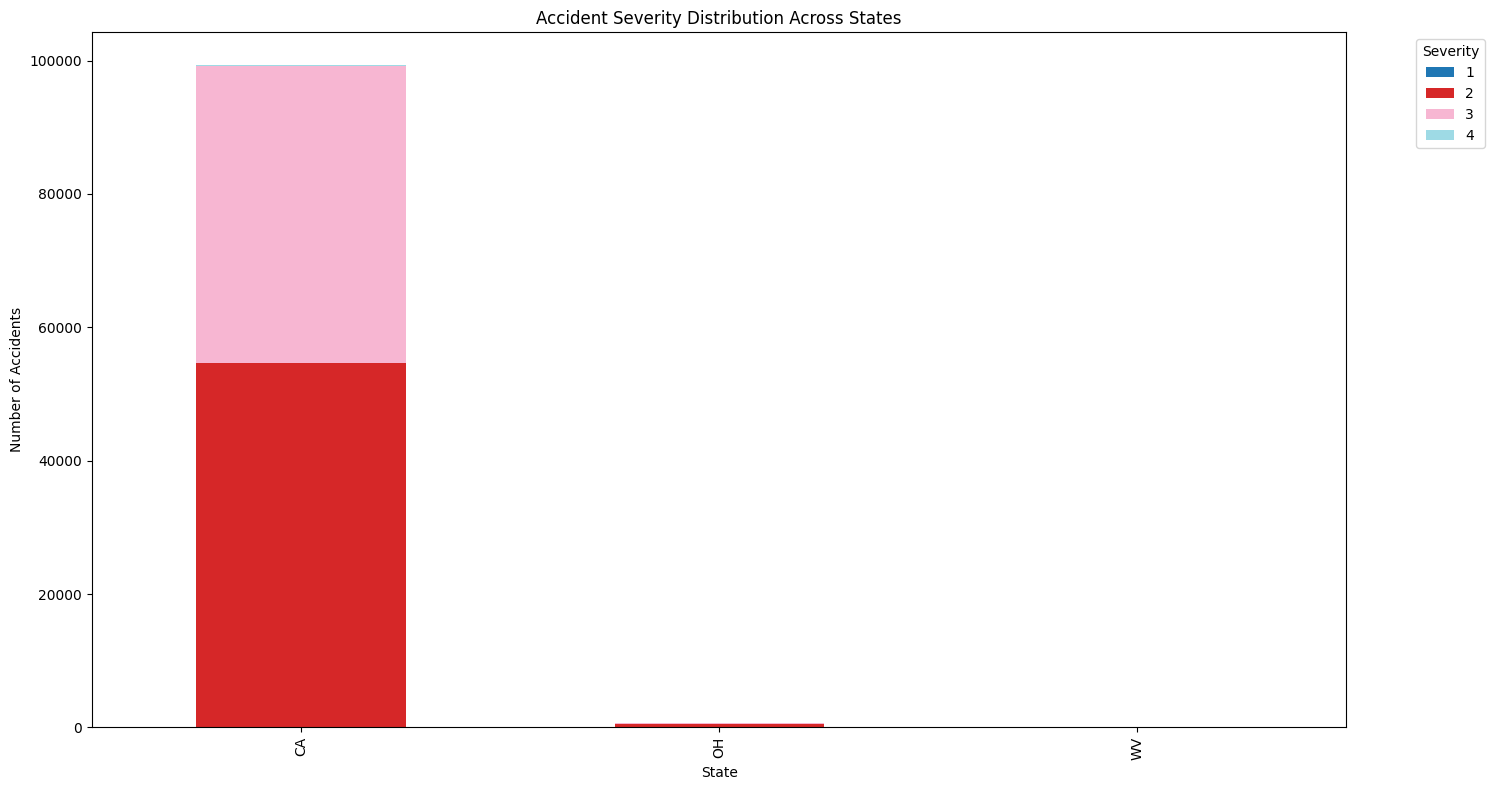

In [13]:
severity_state_counts = accidents_df.groupby(['State', 'Severity']).size().unstack(fill_value=0)


severity_state_counts = severity_state_counts.loc[severity_state_counts.sum(axis=1).sort_values(ascending=False).index]
plt.figure(figsize=(15, 8))
severity_state_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(15, 8))
plt.title('Accident Severity Distribution Across States')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

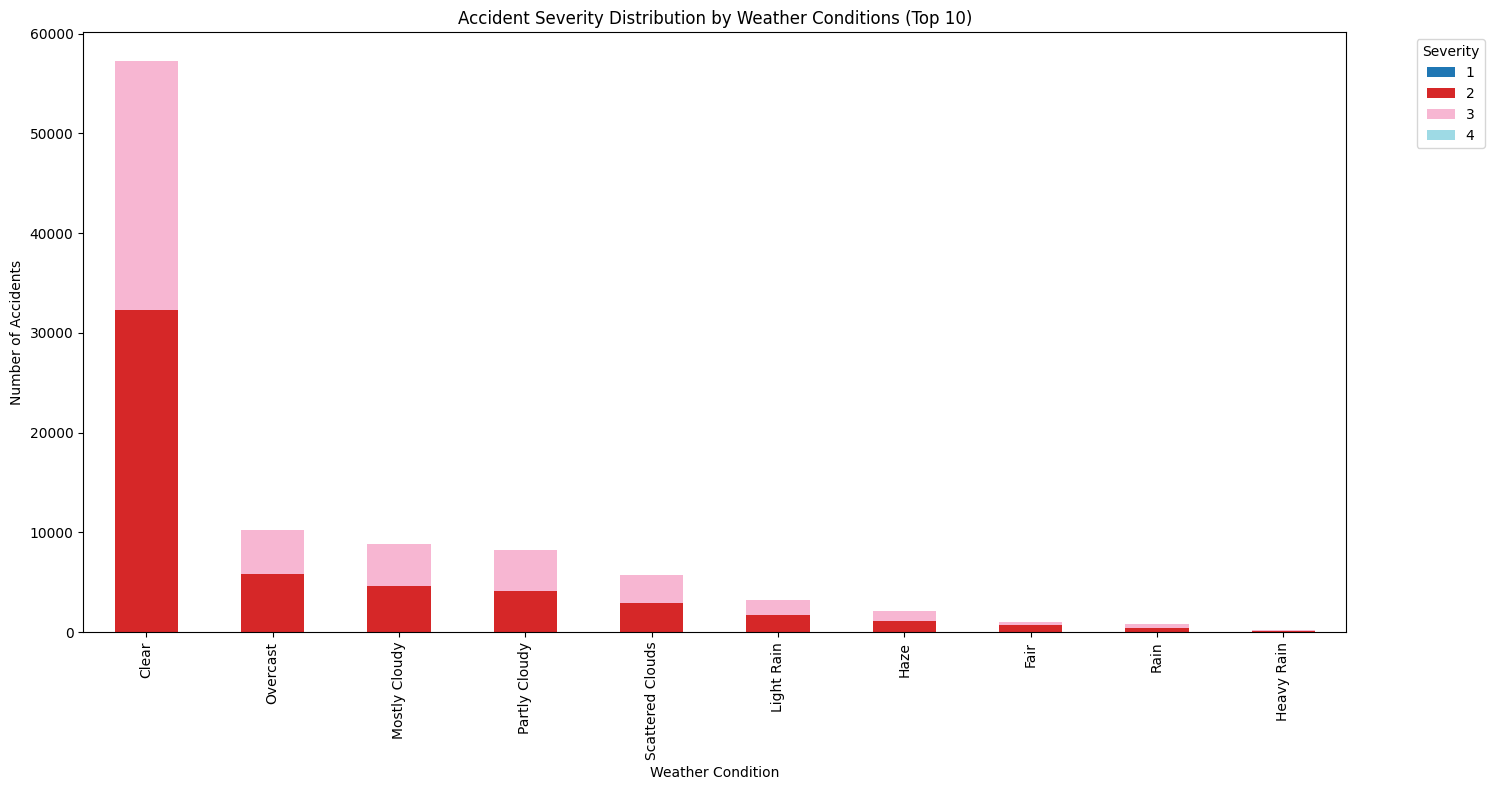

In [14]:
weather_severity_counts = accidents_df.groupby(['Weather_Condition', 'Severity']).size().unstack(fill_value=0)

top_weather_conditions = weather_severity_counts.sum(axis=1).sort_values(ascending=False).head(10).index
filtered_weather_severity = weather_severity_counts.loc[top_weather_conditions]


plt.figure(figsize=(15, 8))
filtered_weather_severity.plot(kind='bar', stacked=True, colormap='tab20', figsize=(15, 8))
plt.title('Accident Severity Distribution by Weather Conditions (Top 10)')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-4194061469.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_night_counts.index, y=day_night_counts.values, palette='coolwarm')


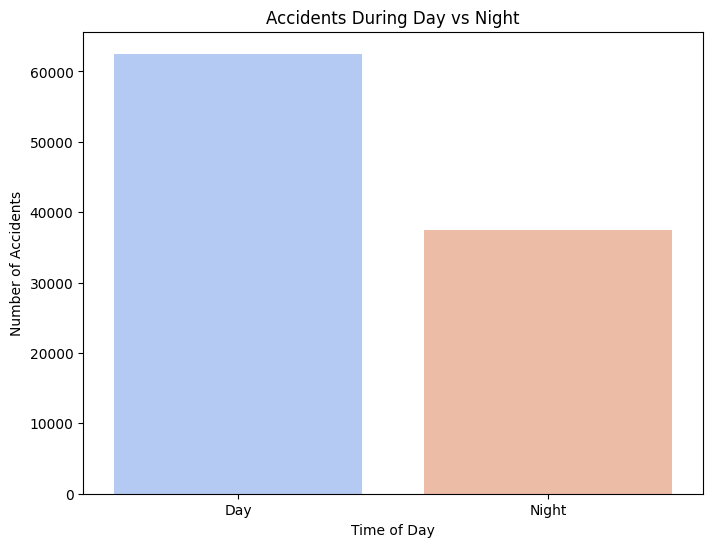

In [15]:
day_night_counts = accidents_df['Sunrise_Sunset'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=day_night_counts.index, y=day_night_counts.values, palette='coolwarm')
plt.title('Accidents During Day vs Night')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.show()

/tmp/ipython-input-181525377.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, palette='Set2')


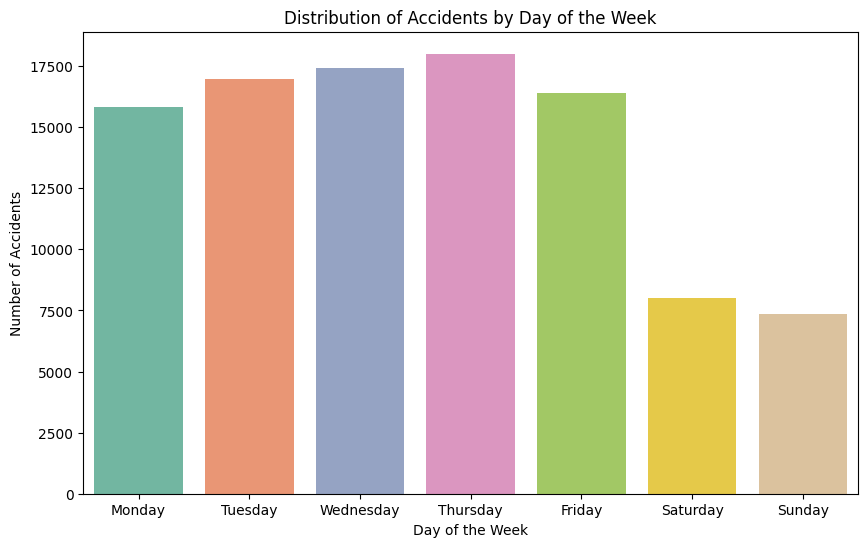

In [16]:
accidents_df['Day_of_Week'] = accidents_df['Start_Time'].dt.day_name()

day_of_week_counts = accidents_df['Day_of_Week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, palette='Set2')
plt.title('Distribution of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

/tmp/ipython-input-2453938158.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette='pastel')


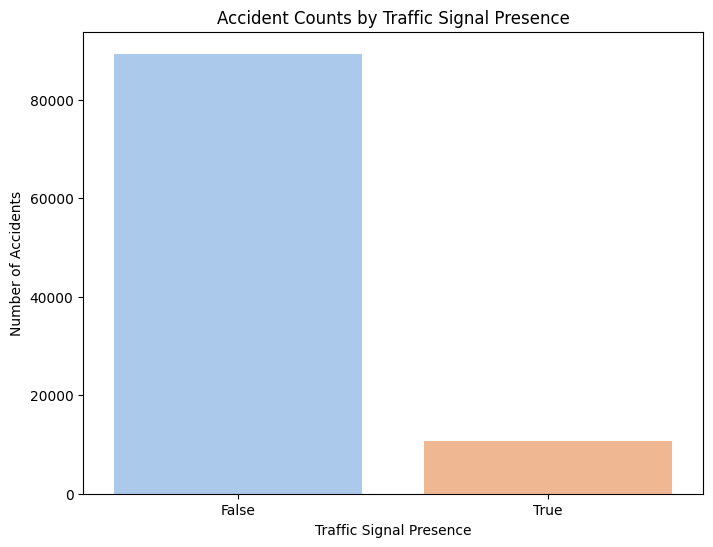

/tmp/ipython-input-2453938158.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette='pastel')


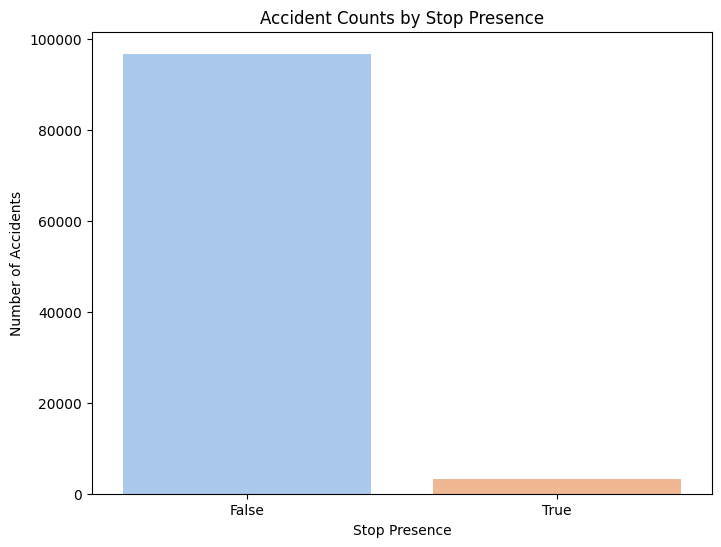

/tmp/ipython-input-2453938158.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette='pastel')


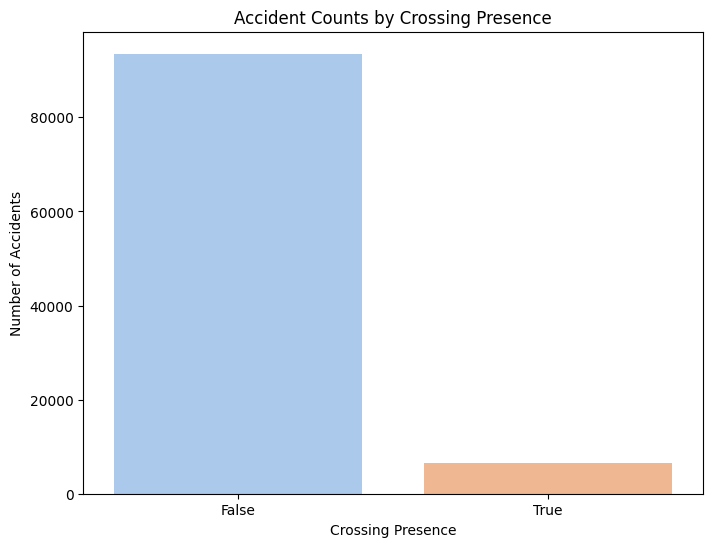

In [17]:
traffic_features = ['Traffic_Signal', 'Stop', 'Crossing']
traffic_feature_counts = {feature: accidents_df[feature].value_counts() for feature in traffic_features}


for feature, counts in traffic_feature_counts.items():
    plt.figure(figsize=(8, 6))
    sns.barplot(x=counts.index.astype(str), y=counts.values, palette='pastel')
    plt.title(f'Accident Counts by {feature.replace("_", " ")} Presence')
    plt.xlabel(f'{feature.replace("_", " ")} Presence')
    plt.ylabel('Number of Accidents')
    plt.show()